In [1]:
import pandas as pd
df = pd.read_csv('Titanic_test.csv')
print(df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ------------

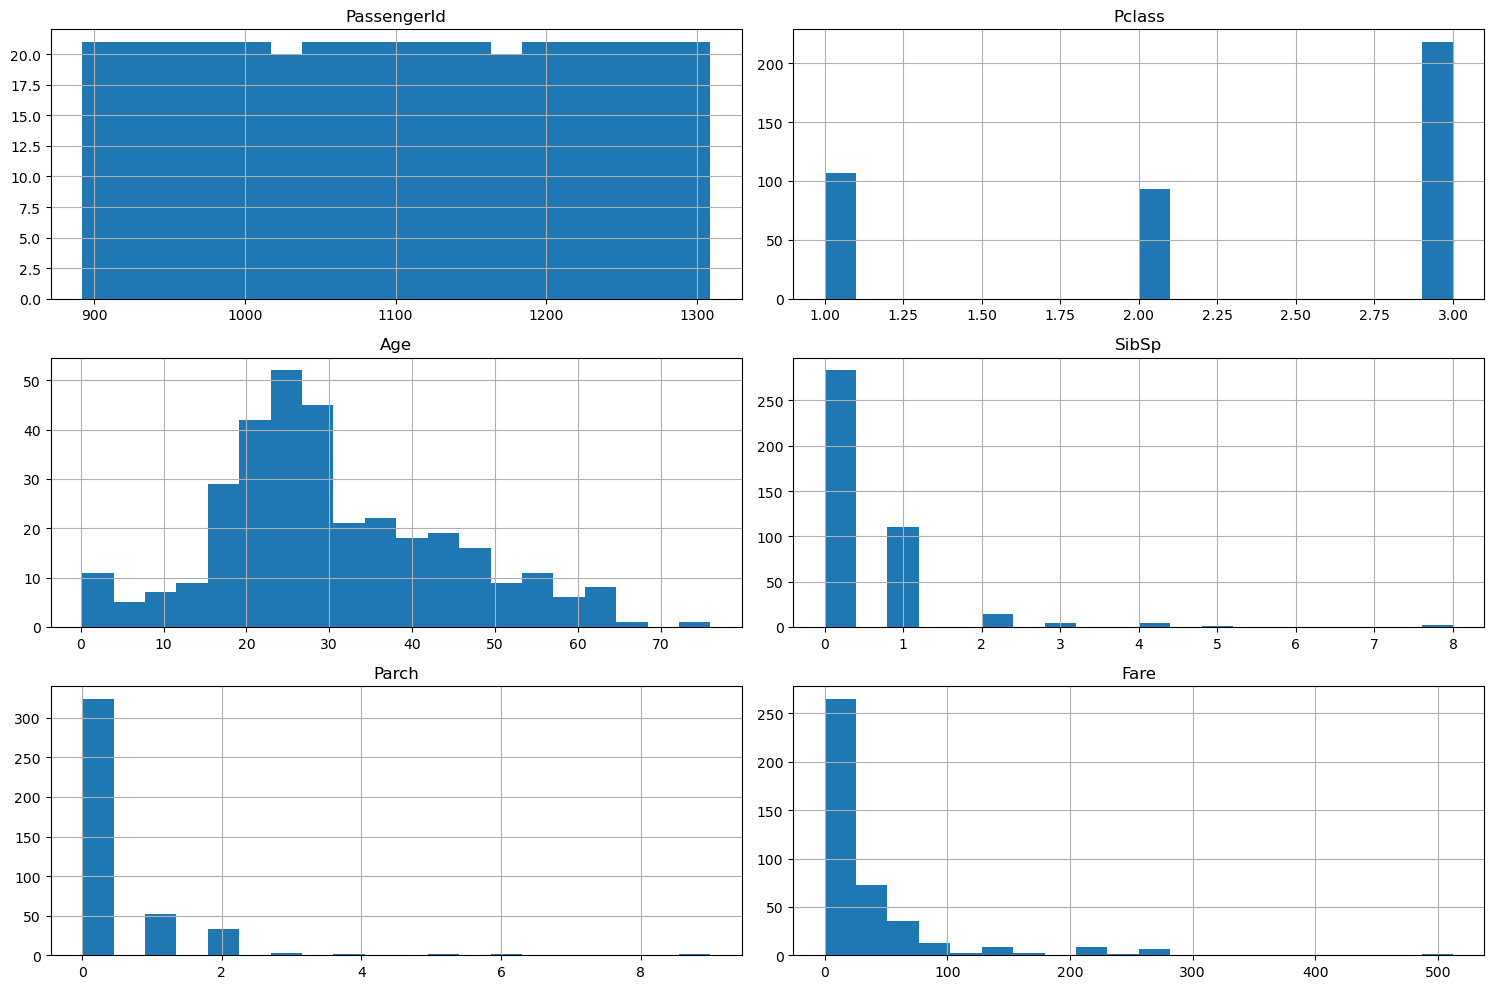

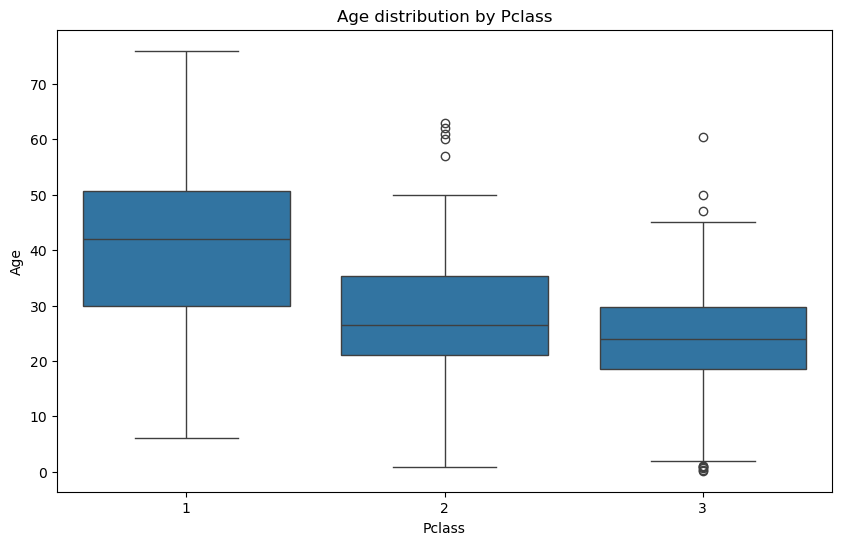

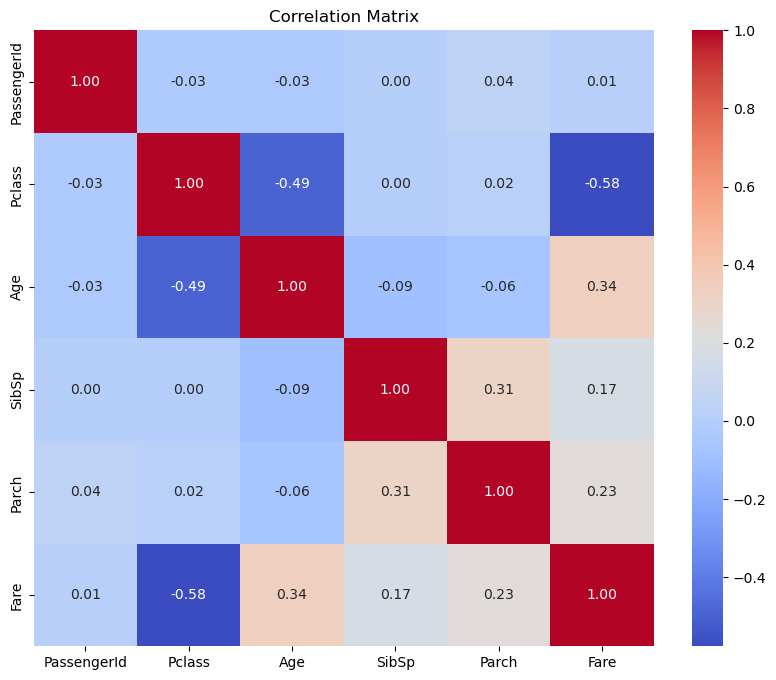

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Titanic_test.csv')
print(df.head())

# Display information about the dataset
df.info()

# Display summary statistics
print(df.describe())

# Visualize distributions of numerical features
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


# Visualize relationships with box plots for categorical features vs numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age distribution by Pclass')
plt.show()



# Analyze correlations
# Check if there are enough numerical columns to calculate correlation matrix
numerical_cols = df.select_dtypes(include='number').columns
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("Not enough numerical columns to plot a correlation matrix.")

In [23]:
#  2. Data Preprocessing:
# a. Handle missing values (e.g., imputation).
# b. Encode categorical variables.

# a. Handle missing values
# Impute missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing 'Fare' values with the median fare (though typically Fare is not missing in test set, good practice)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# 'Cabin' has too many missing values, so we might drop it or impute with a placeholder
# For simplicity, we will drop the 'Cabin' column in this example
df.drop('Cabin', axis=1, inplace=True)

# Impute missing 'Embarked' values with the most frequent value (mode)
# First, check if 'Embarked' exists in the test dataset
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify that there are no more missing values (excluding 'Survived' which is the target variable)
print("\nMissing values after imputation:")
print(df.isnull().sum())

# b. Encode categorical variables
# Select categorical columns to encode
categorical_cols = ['Sex', 'Embarked'] # 'Pclass' is numerical, no need to encode

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the preprocessed data
print("\nData after handling missing values and encoding categorical variables:")
print(df.head())

# Display information about the preprocessed dataset
df.info()


Missing values after imputation:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data after handling missing values and encoding categorical variables:
   PassengerId  Pclass                                          Name   Age  \
0          892       3                              Kelly, Mr. James  34.5   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  47.0   
2          894       2                     Myles, Mr. Thomas Francis  62.0   
3          895       3                              Wirz, Mr. Albert  27.0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0   

   SibSp  Parch   Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0      0      0   330911   7.8292      True        True       False  
1      1      0   363272   7.0000     False       False        True  
2      0      0   240276   9.687

C:\Users\vogul\AppData\Local\Temp\ipykernel_11320\1091900163.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\vogul\AppData\Local\Temp\ipykernel_11320\1091900163.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [25]:
# 3. Model Building:
# a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
# b. Train the model using the training data.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd # Ensure pandas is imported



# Example: Load training data (replace 'Titanic_train.csv' with your actual training file)
try:
    df_train = pd.read_csv('Titanic_train.csv')


    # Handle missing values in df_train
    df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
    df_train['Fare'].fillna(df_train['Fare'].median(), inplace=True) # Fare might be missing in train too
    if 'Cabin' in df_train.columns: # Check if 'Cabin' exists before dropping
        df_train.drop('Cabin', axis=1, inplace=True)
    if 'Embarked' in df_train.columns: # Check if 'Embarked' exists before filling
        df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

    # Encode categorical variables in df_train
    categorical_cols_train = ['Sex', 'Embarked'] # 'Pclass' is numerical
    df_train = pd.get_dummies(df_train, columns=categorical_cols_train, drop_first=True)

    # Identify features (X) and target (y)
    # Exclude 'PassengerId', 'Name', 'Ticket', and the target variable 'Survived'
    # You need to ensure 'Survived' is present in your training data.
    if 'Survived' in df_train.columns:
        X_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1, errors='ignore')
        y_train = df_train['Survived']

        all_columns = list(set(X_train.columns) | set(df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, errors='ignore').columns))
        # Reindex both dataframes to have the same columns, filling missing columns with 0
        X_train = X_train.reindex(columns=all_columns, fill_value=0)
        # Do the same for the test data (assuming df is the preprocessed test data)
        X_test = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, errors='ignore').reindex(columns=all_columns, fill_value=0)


        # a. Build a logistic regression model
        model = LogisticRegression(solver='liblinear', random_state=0)

        # b. Train the model using the training data
        model.fit(X_train, y_train)

        print("Logistic Regression model trained successfully.")
        # You can now use this trained model to make predictions on the test data (X_test)
        predictions = model.predict(X_test)
        print("\nPredictions on test data:", predictions[:5]) # Display first 5 predictions

    else:
        print("The 'Survived' column is not found in the training data. Cannot train the model.")
        print("Please ensure you have loaded the correct training dataset and it contains the 'Survived' target variable.")

except FileNotFoundError:
    print("Error: 'Titanic_train.csv' not found. Please make sure the training data file is in the correct directory.")

Logistic Regression model trained successfully.

Predictions on test data: [0 0 0 0 1]


C:\Users\vogul\AppData\Local\Temp\ipykernel_11320\2708323437.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
C:\Users\vogul\AppData\Local\Temp\ipykernel_11320\2708323437.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

Logistic Regression model trained successfully.

Predictions on test data: [0 0 0 0 1]

Model Evaluation on Validation Set:
Accuracy: 0.8045
Precision: 0.7826
Recall: 0.7297
F1-score: 0.7552
ROC-AUC Score: 0.8810


C:\Users\vogul\AppData\Local\Temp\ipykernel_11320\3919065506.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
C:\Users\vogul\AppData\Local\Temp\ipykernel_11320\3919065506.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

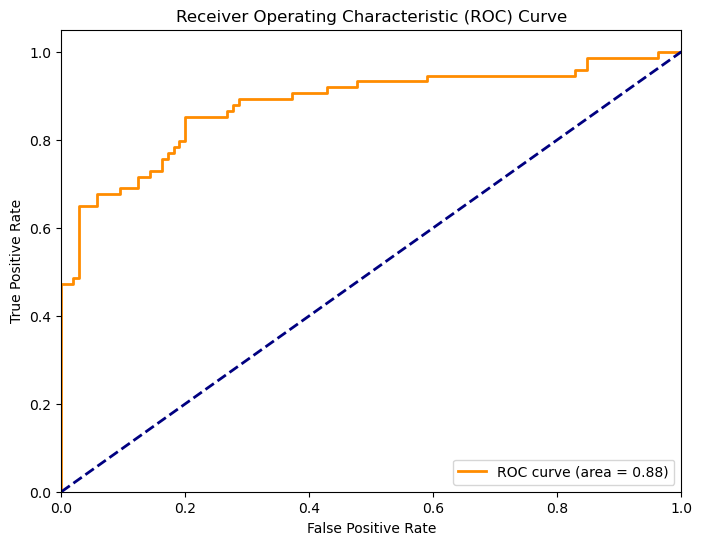

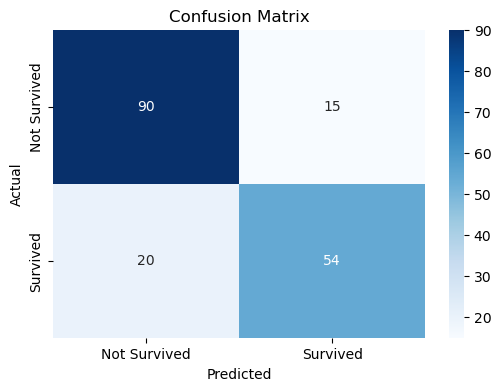

In [27]:
#  4. Model Evaluation:
# a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
# Visualize the ROC curve.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split # Ensure train_test_split is imported here too
import pandas as pd # Ensure pandas is imported


try:
    df_train = pd.read_csv('Titanic_train.csv')



    # Handle missing values in df_train
    df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
    df_train['Fare'].fillna(df_train['Fare'].median(), inplace=True) # Fare might be missing in train too
    if 'Cabin' in df_train.columns: # Check if 'Cabin' exists before dropping
        df_train.drop('Cabin', axis=1, inplace=True)
    if 'Embarked' in df_train.columns: # Check if 'Embarked' exists before filling
        df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)

    # Encode categorical variables in df_train
    categorical_cols_train = ['Sex', 'Embarked'] # 'Pclass' is numerical
    df_train = pd.get_dummies(df_train, columns=categorical_cols_train, drop_first=True)

    # Identify features (X) and target (y)
    # Exclude 'PassengerId', 'Name', 'Ticket', and the target variable 'Survived'
    # You need to ensure 'Survived' is present in your training data.
    if 'Survived' in df_train.columns:
        X_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1, errors='ignore')
        y_train = df_train['Survived']

        
        try:
            # If df is not defined, load and preprocess it (simplified for example)
            if 'df' not in locals() and 'df' not in globals():
                 df = pd.read_csv('Titanic_test.csv')
                 df['Age'].fillna(df['Age'].median(), inplace=True)
                 df['Fare'].fillna(df['Fare'].median(), inplace=True)
                 if 'Cabin' in df.columns: df.drop('Cabin', axis=1, inplace=True)
                 if 'Embarked' in df.columns: df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
                 df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


            all_columns = list(set(X_train.columns) | set(df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, errors='ignore').columns))
            # Reindex both dataframes to have the same columns, filling missing columns with 0
            X_train = X_train.reindex(columns=all_columns, fill_value=0)
            # Do the same for the test data (assuming df is the preprocessed test data)
            X_test = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, errors='ignore').reindex(columns=all_columns, fill_value=0)

            # Import LogisticRegression here if not already imported
            from sklearn.linear_model import LogisticRegression
            # Build a logistic regression model
            model = LogisticRegression(solver='liblinear', random_state=0)

            # Train the model using the training data
            model.fit(X_train, y_train)

            print("Logistic Regression model trained successfully.")
            # You can now use this trained model to make predictions on the test data (X_test)
            predictions = model.predict(X_test)
            print("\nPredictions on test data:", predictions[:5]) # Display first 5 predictions

        except NameError:
             print("Error: 'df' (test data) is not defined. Please run the preprocessing steps for the test data first.")
             # Exit the cell execution if df is not available to avoid further errors
             raise

    else:
        print("The 'Survived' column is not found in the training data. Cannot train the model.")
        print("Please ensure you have loaded the correct training dataset and it contains the 'Survived' target variable.")

except FileNotFoundError:
    print("Error: 'Titanic_train.csv' not found. Please make sure the training data file is in the correct directory.")

# --- End: Code from previous cell ---


# Make predictions on the testing data
# Note: The test dataset ('Titanic_test.csv') provided for the competition
# does not contain the 'Survived' column. To evaluate the model properly
# using standard metrics like accuracy, precision, recall, etc., you would
# typically need a test set with the ground truth labels or use a validation
# split from your original training data.

# Assuming you have a separate validation set or are evaluating on a subset
# of your training data for demonstration purposes.
# For the competition setting where the test set has no labels, you would
# make predictions and submit them for evaluation on the competition platform.

# For demonstration, let's split the *training* data to simulate evaluation
# on a hold-out set.
# If you have actual test data with labels, replace this section with using
# X_test and y_test derived from that labeled test data.

# Check if X_train and y_train were successfully created from the training data
if 'X_train' in locals() and 'y_train' in locals():
    # Split training data into training and validation sets for evaluation
    X_train_eval, X_val_eval, y_train_eval, y_val_eval = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )

    # Re-train the model on the training evaluation split (optional, depends on workflow)
    # Or use the model trained on the full training data if you prefer
    # model.fit(X_train_eval, y_train_eval) # If re-training

    # Predict on the validation set
    y_pred = model.predict(X_val_eval)
    y_proba = model.predict_proba(X_val_eval)[:, 1] # Probability of the positive class

    # Evaluate the model
    accuracy = accuracy_score(y_val_eval, y_pred)
    precision = precision_score(y_val_eval, y_pred)
    recall = recall_score(y_val_eval, y_pred)
    f1 = f1_score(y_val_eval, y_pred)
    roc_auc = roc_auc_score(y_val_eval, y_proba)

    print("\nModel Evaluation on Validation Set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # Visualize the ROC curve
    fpr, tpr, thresholds = roc_curve(y_val_eval, y_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Optional: Display confusion matrix
    cm = confusion_matrix(y_val_eval, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

else:
    print("\nCannot perform model evaluation using standard metrics because the training data did not contain the 'Survived' column or there was an error loading/processing the training data.")

In [29]:
#  5. Interpretation:

# Check if the model object exists and is trained
import numpy as np
import pandas as pd

if 'model' in locals() and hasattr(model, 'coef_'):
    print("\nInterpretation of Logistic Regression Coefficients:")

    # Get the names of the features used in the trained model
    # Assuming the order of features in model.coef_ corresponds to the order in X_train
    feature_names = X_train.columns

    # Pair feature names with their coefficients
    coefficients = model.coef_[0] # For binary classification, coef_ is a 2D array (1, n_features)
    intercept = model.intercept_[0]

    print(f"Intercept (Log-Odds when all predictors are 0): {intercept:.4f}")

    # Create a DataFrame for easier viewing
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient (Log-Odds)': coefficients})
    coef_df['Odds Ratio (e^Coefficient)'] = np.exp(coefficients)

    # Sort by absolute value of coefficient to see most influential features
    coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient (Log-Odds)'])
    coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

    print(coef_df.to_string(index=False)) # Use to_string for better formatting of the full dataframe

    # Example interpretation for a few features:
    print("\nExample Interpretations:")
    # Find the row for 'Sex_male' if it exists
    sex_male_coef_row = coef_df[coef_df['Feature'] == 'Sex_male']
    if not sex_male_coef_row.empty:
        sex_male_coef = sex_male_coef_row['Coefficient (Log-Odds)'].iloc[0]
        sex_male_odds_ratio = sex_male_coef_row['Odds Ratio (e^Coefficient)'].iloc[0]
        print(f"- The coefficient for 'Sex_male' ({sex_male_coef:.4f}) is negative. This indicates that being male (compared to the baseline, female) is associated with a decrease in the log-odds of survival.")
        print(f"  The odds ratio ({sex_male_odds_ratio:.4f}) means the odds of survival for males are about {sex_male_odds_ratio:.2f} times the odds of survival for females, holding other factors constant. Since the ratio is less than 1, it means males have significantly lower odds of survival.")

    # Find the row for 'Pclass' if it exists
    pclass_coef_row = coef_df[coef_df['Feature'] == 'Pclass']
    if not pclass_coef_row.empty:
        pclass_coef = pclass_coef_row['Coefficient (Log-Odds)'].iloc[0]
        pclass_odds_ratio = pclass_coef_row['Odds Ratio (e^Coefficient)'].iloc[0]
        print(f"- The coefficient for 'Pclass' ({pclass_coef:.4f}) is negative. This suggests that belonging to a higher Pclass number (e.g., 3rd class compared to 1st class) is associated with a decrease in the log-odds of survival.")
        print(f"  For every one-unit increase in Pclass (e.g., moving from 1st to 2nd class, or 2nd to 3rd), the odds of survival are multiplied by {pclass_odds_ratio:.4f}, holding other factors constant. Since this is less than 1, higher Pclass is associated with lower survival odds.")

    # Find the row for 'Fare' if it exists
    fare_coef_row = coef_df[coef_df['Feature'] == 'Fare']
    if not fare_coef_row.empty:
        fare_coef = fare_coef_row['Coefficient (Log-Odds)'].iloc[0]
        fare_odds_ratio = fare_coef_row['Odds Ratio (e^Coefficient)'].iloc[0]
        print(f"- The coefficient for 'Fare' ({fare_coef:.4f}) is positive. This suggests that paying a higher fare is associated with an increase in the log-odds of survival.")
       

else:
    print("\nLogistic Regression model not trained or 'model' object does not exist. Cannot interpret coefficients.")


# b. Discuss the significance of features in predicting the target variable.
print("\nDiscussion on Significance of Features:")



if 'coef_df' in locals():
    print("\nBased on the Magnitude of Coefficients (Log-Odds):")
    print("Features with larger absolute coefficient values have a stronger impact on the predicted log-odds of survival.")
    print("From the table above (sorted by absolute coefficient), we can see which features have the largest impact.")
    print(coef_df.head().to_string(index=False)) # Show top features by absolute coefficient magnitude

    print("\nCommonly significant features in Titanic survival based on typical analyses and our model:")
    

    if 'Sex_male' in coef_df['Feature'].values:
        print(f"- Sex_male: Has a very large negative coefficient, indicating that being male is strongly associated with significantly lower survival odds compared to being female. This is consistently one of the most significant predictors in Titanic datasets due to the 'women and children first' protocol.")
    if 'Pclass' in coef_df['Feature'].values:
         print(f"- Pclass: Has a negative coefficient. Higher Pclass numbers (lower class) are strongly associated with lower survival odds. Passengers in higher classes likely had better access to lifeboats.")
    if 'Age' in coef_df['Feature'].values:
         print(f"- Age: The coefficient for Age is also typically negative (though its magnitude might be smaller than Sex or Pclass), suggesting that older individuals might have slightly lower survival odds, perhaps due to mobility or the 'children first' protocol. The non-linear relationship might not be fully captured by the linear logistic regression model.")
    if 'Fare' in coef_df['Feature'].values:
         print(f"- Fare: Has a positive coefficient. Higher fare is associated with higher survival odds. This likely correlates with Pclass and potentially location on the ship, suggesting a link between wealth/class and survival.")
    if 'SibSp' in coef_df['Feature'].values:
         print(f"- SibSp (Number of Siblings/Spouses Aboard): The coefficient suggests its impact. It might indicate family size, which could influence survival chances (e.g., easier evacuation in smaller groups).")
    if 'Parch' in coef_df['Feature'].values:
         print(f"- Parch (Number of Parents/Children Aboard): Similar to SibSp, indicates family size.")
    if 'Embarked_Q' in coef_df['Feature'].values and 'Embarked_S' in coef_df['Feature'].values:
         print(f"- Embarked: The coefficients for the 'Embarked' dummy variables (Embarked_Q, Embarked_S) suggest the impact of the embarkation port compared to the baseline port (which is 'C' if drop_first=True was used and 'C' was the first category alphabetically). The significance can vary.")

    print("\nOverall:")
    print("Based on the model's coefficients, 'Sex_male' and 'Pclass' appear to be the most significant predictors of survival probability.")
    print("Age and Fare also show notable associations.")
    print("The statistical significance of these features would ideally be confirmed with p-values from a statistical library (like Statsmodels), which provides more detailed regression summaries.")
else:
    print("\nCannot discuss feature significance as the model coefficients are not available.")




Interpretation of Logistic Regression Coefficients:
Intercept (Log-Odds when all predictors are 0): 3.9276
   Feature  Coefficient (Log-Odds)  Odds Ratio (e^Coefficient)
  Sex_male               -2.477114                    0.083985
    Pclass               -0.836195                    0.433356
     SibSp               -0.293252                    0.745834
Embarked_S               -0.242706                    0.784502
     Parch               -0.075291                    0.927474
Embarked_Q                0.038142                    1.038879
       Age               -0.028048                    0.972342
      Fare                0.004585                    1.004596

Example Interpretations:
- The coefficient for 'Sex_male' (-2.4771) is negative. This indicates that being male (compared to the baseline, female) is associated with a decrease in the log-odds of survival.
  The odds ratio (0.0840) means the odds of survival for males are about 0.08 times the odds of survival for females, 

In [31]:
# 6. Deployment with Streamlit:
 

!pip install streamlit

import streamlit as st
import pandas as pd
import numpy as np
import joblib # To save and load the model and potentially the list of columns



# --- Streamlit App Code ---

st.title('Titanic Survival Prediction')

st.write("""
This app predicts the probability of survival on the Titanic
using a Logistic Regression model.
""")

# Load the trained model and the list of columns used during training
try:
    model = joblib.load('logistic_regression_model.pkl')
    model_columns = joblib.load('model_columns.pkl')
    st.success("Model and columns loaded successfully!")
except FileNotFoundError:
    st.error("Error: Model files ('logistic_regression_model.pkl' or 'model_columns.pkl') not found.")
    st.write("Please make sure you have run the training script and saved the model and column list.")
    model = None # Set model to None if loading fails
    model_columns = []
except Exception as e:
     st.error(f"An error occurred while loading the model: {e}")
     model = None
     model_columns = []


if model is not None:
    st.header('Enter Passenger Information:')

    # Create input fields for the features used by the model
    # Need to consider the original features and the one-hot encoded ones

    # Original features from Titanic data
    pclass = st.selectbox('Pclass (Passenger Class)', [1, 2, 3])
    sex = st.selectbox('Sex', ['male', 'female'])
    age = st.slider('Age', 0.1, 80.0, 30.0)
    sibsp = st.slider('SibSp (Number of Siblings/Spouses Aboard)', 0, 8, 0)
    parch = st.slider('Parch (Number of Parents/Children Aboard)', 0, 6, 0)
    fare = st.number_input('Fare', value=30.0, format="%.2f")
    embarked = st.selectbox('Embarked (Port of Embarkation)', ['C', 'Q', 'S']) # Assuming 'C' is the baseline


    # Prepare input data for prediction
    # This requires replicating the preprocessing steps used for training data
    input_data = {
        'Pclass': pclass,
        'Age': age,
        'SibSp': sibsp,
        'Parch': parch,
        'Fare': fare,
        'Sex': sex,
        'Embarked': embarked
    }

    input_df = pd.DataFrame([input_data])

    # Apply one-hot encoding for 'Sex' and 'Embarked'
    # Need to make sure the column names match the training data exactly
    input_df = pd.get_dummies(input_df, columns=['Sex', 'Embarked'], drop_first=True)

    # Align columns with the training data columns (model_columns)
    # This is crucial! Add missing columns with 0 and keep only columns used by the model
    input_processed = input_df.reindex(columns=model_columns, fill_value=0)

    # Button to make prediction
    if st.button('Predict Survival'):
        try:
            # Make prediction
            prediction = model.predict(input_processed)
            prediction_proba = model.predict_proba(input_processed)[:, 1] # Probability of survival

            # Display result
            st.subheader('Prediction Result')
            if prediction[0] == 1:
                st.success(f"The model predicts: **Survived**")
            else:
                st.error(f"The model predicts: **Not Survived**")

            st.write(f"Probability of Survival: **{prediction_proba[0]:.2f}**")

        except Exception as e:
            st.error(f"An error occurred during prediction: {e}")

else:
    st.warning("Model is not loaded. Please ensure the model files exist.")


st.write("---")
st.write("Note: This is a demonstration based on a Logistic Regression model trained on the Titanic dataset. The predictions are estimates.")

# To run this Streamlit app:
# 1. Save the code above as a Python file (e.g., `streamlit_app.py`).
# 2. Make sure you have `streamlit`, `pandas`, `numpy`, and `scikit-learn` installed (`pip install streamlit pandas numpy scikit-learn joblib`).
# 3. Ensure you have saved the trained model (`logistic_regression_model.pkl`) and the list of columns (`model_columns.pkl`) from your training script.
# 4. Open your terminal or command prompt.
# 5. Navigate to the directory where you saved the file.
# 6. Run the command: `streamlit run streamlit_app.py`
# 7. This will open the app in your web browser.
